In [10]:
!pip install scipy==1.12.0
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl (46.2 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyfume 0.3.4 requires scipy==1.10.1, but you have scipy 1.12.0 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl.metadata (58 kB)
Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.12.0
    Uninstalling scipy-1.12.0:
      Successfully uninstalled scipy-1.12.0


In [11]:
from gensim.models import KeyedVectors

w = KeyedVectors.load_word2vec_format(
    r'./.datasets/GoogleNews-vectors-negative300.bin.gz',
    binary=True
)

In [12]:
w.get_vector('United_States')

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [13]:
print(w.similarity('United_States', 'U.S.'))

0.73107743


In [14]:
import numpy as np
united_states_vec = w.get_vector('United_States')
us_vec = w.get_vector('U.S.')
# コサイン類似度 = 内積 / (ノルム * ノルム)
np.dot(united_states_vec, us_vec) / np.linalg.norm(united_states_vec) / np.linalg.norm(us_vec)

0.73107743

64~66はやらなくてよし

63. 加法構成性によるアナロジー  
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．  

64. アナロジーデータでの実験  
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．  

65. アナロジータスクでの正解率  
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．  

66. WordSimilarity-353での評価  
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．  

67. k-meansクラスタリング    
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．  

68. Ward法によるクラスタリング  
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．  
  
69. t-SNEによる可視化  
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．  

In [16]:
# 63
calculated_wv = w.get_vector('Spain') - w.get_vector('Madrid') + w.get_vector('Athens')
similar_words = w.similar_by_vector(calculated_wv, topn=10)
for word, similarity in similar_words:
    print(f"{word}: {similarity}")
similar_words = w.similar_by_vector(calculated_wv, topn=10)
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

Athens: 0.7528455853462219
Greece: 0.6685471534729004
Aristeidis_Grigoriadis: 0.5495778322219849
Ioannis_Drymonakos: 0.5361457467079163
Greeks: 0.5351786017417908
Ioannis_Christou: 0.5330225825309753
Hrysopiyi_Devetzi: 0.5088489055633545
Iraklion: 0.5059264302253723
Greek: 0.5040615797042847
Athens_Greece: 0.5034108757972717
Athens: 0.7528455853462219
Greece: 0.6685471534729004
Aristeidis_Grigoriadis: 0.5495778322219849
Ioannis_Drymonakos: 0.5361457467079163
Greeks: 0.5351786017417908
Ioannis_Christou: 0.5330225825309753
Hrysopiyi_Devetzi: 0.5088489055633545
Iraklion: 0.5059264302253723
Greek: 0.5040615797042847
Athens_Greece: 0.5034108757972717


In [ ]:
# 64
result_str=": capital-common-countries\n"
with open(r'./.datasets/questions-words.txt','r') as f:
    rows=f.readlines()
    row_index=0
    for row in rows:
        if not row.startswith(":"):
            splited_row=row.split(" ")
            calced_wv=w.get_vector(splited_row[1].replace("\n",""))-w.get_vector(splited_row[0].replace("\n",""))+w.get_vector(splited_row[2].replace("\n",""))
            result_str+=f"{row} {w.similar_by_vector(calced_wv)}\n"
        row_index+=1
with open(r'./.datasets/questions-words.txt','w') as f:
    w.write(result_str)
# This cell will not finish

c:\Users\spyk4\.conda\envs\ai-prog-4\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


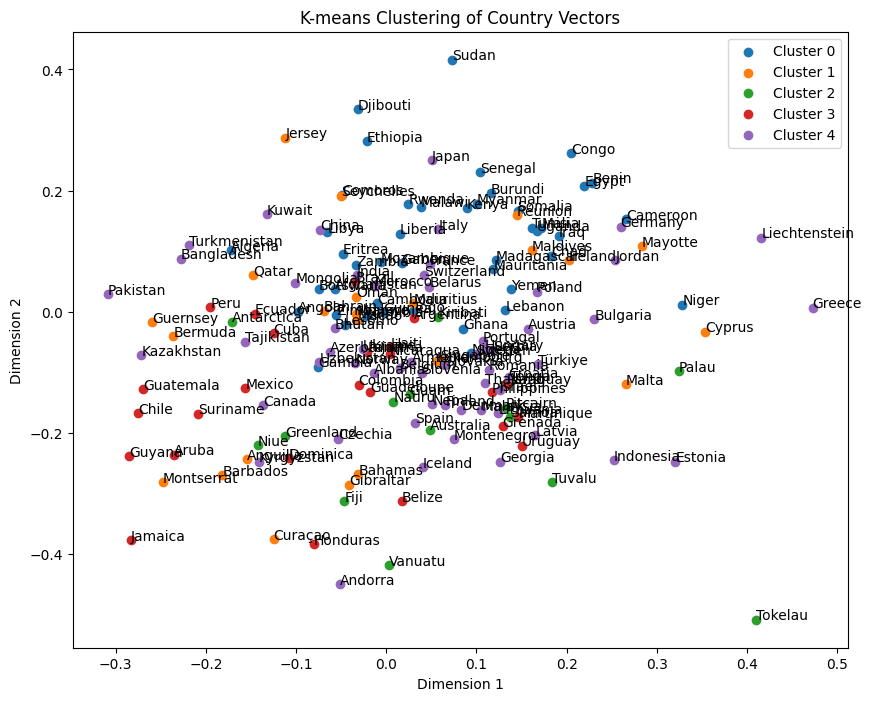

In [31]:
# 67
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CSVファイルから国名を抽出
df = pd.read_csv('./.datasets/all_country.csv')
countries = df['name']
country_vectors = []
valid_countries = []

for country in countries:
    try:
        country_vectors.append(w.get_vector(country))
        valid_countries.append(country)  # 有効な国名を追加
    except:
        pass

# k-meansクラスタリングをクラスタ数k=5として実行
kmeans = KMeans(n_clusters=5, random_state=0).fit(country_vectors)
labels = kmeans.labels_
# クラスタリング結果を可視化
plt.figure(figsize=(10, 8))
for i in range(5):
    cluster_points = np.array([country_vectors[j] for j in range(len(labels)) if labels[j] == i])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
for i, country in enumerate(valid_countries):  # valid_countriesを使用
    plt.annotate(country, (country_vectors[i][0], country_vectors[i][1]))
plt.title('K-means Clustering of Country Vectors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()
